(128, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


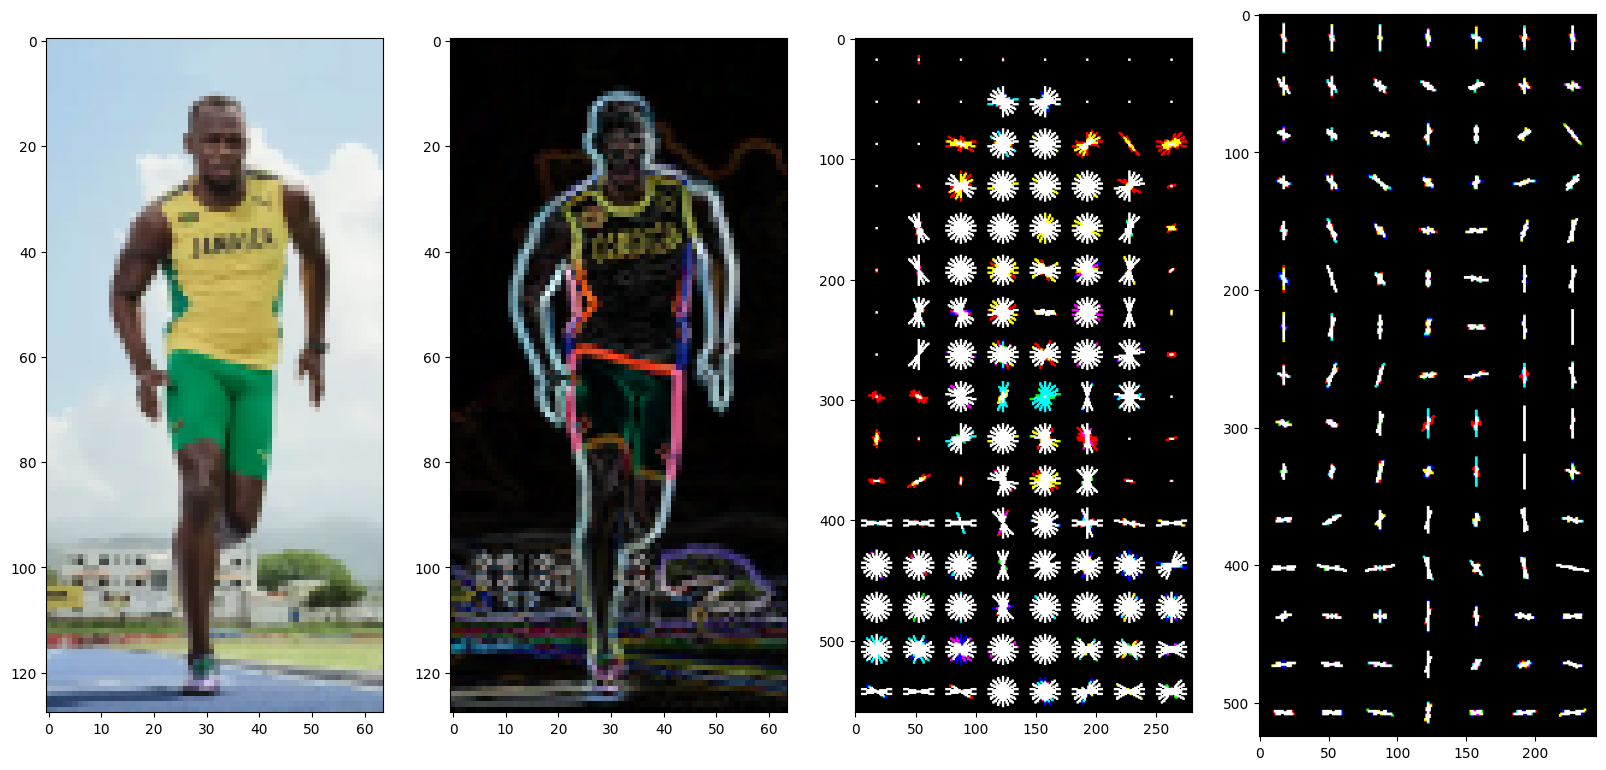

In [3]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
from HistogramOfGradients import HOG

img_path = os.path.join("test_images","bolt.png")
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape)
hog = HOG(img)

#plt.imshow(hog.Get_Norm_HOG_Graphics())
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,14))
ax[0].imshow(hog.original_image)
ax[1].imshow(hog.gmag)
ax[2].imshow(hog.Get_HOG_Graphics(thick=2))
ax[3].imshow(hog.Get_Norm_HOG_Graphics(thick=2))
plt.show()




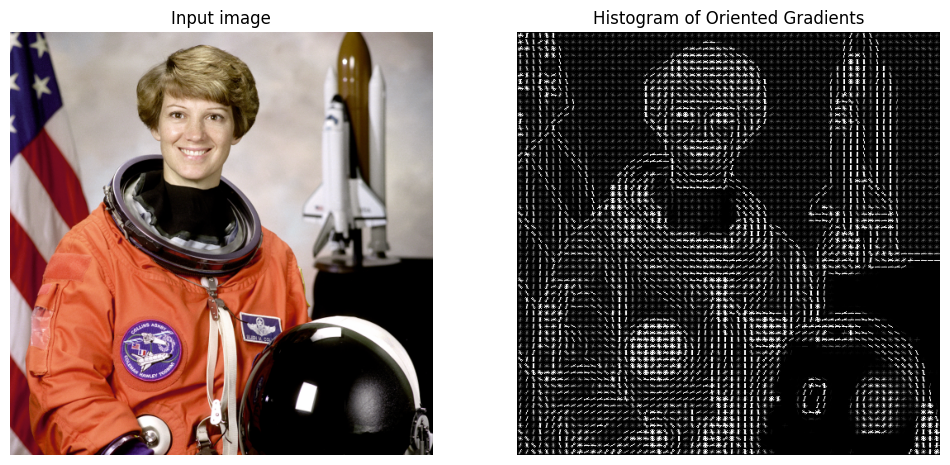

(512, 512, 3) (512, 512) (36864,) float64
[0.43518307 0.43518307 0.         0.43518307 0.43518307 0.43518307
 0.21982719 0.         0.06895288 0.56220087 0.56220087 0.
 0.         0.         0.05554346 0.         0.22069314 0.56220087
 0.56087    0.14665179 0.08543094 0.06881091 0.01647513 0.09392494
 0.11679499 0.56087    0.56087    0.61848194 0.1651471  0.22317218]


In [74]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
from HistogramOfGradients import HOG


image = data.astronaut()

fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(1,1), visualize=True, channel_axis=2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()
print(image.shape, hog_image.shape, fd.shape, fd.dtype)
print(fd[:30])

(512, 512, 3)
torch.Size([1, 3, 512, 512]) torch.float32
torch.Size([1, 3, 128, 64])
(3, 128, 64)
(512,) 512


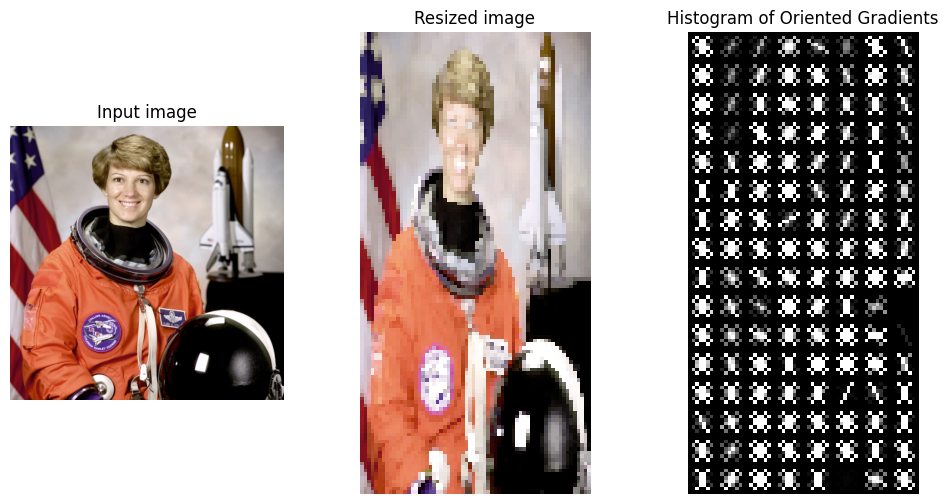

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import data, exposure
import torch
from torchvision.ops import roi_pool

target_res=(128,64)

image = data.astronaut()
print(image.shape)
input_tensor = torch.from_numpy(image).permute(2,0,1).unsqueeze(0).to(torch.float)
print(input_tensor.shape, input_tensor.dtype)
boxes = torch.tensor((0,0,0,512,512)).reshape(1,5).to(torch.float)

img_pooled = roi_pool(input_tensor,boxes,target_res)
print(img_pooled.shape)
img_resized = img_pooled.reshape(3,128,64).to(torch.uint8).numpy()
print(img_resized.shape)


fd, hog_image = hog(img_resized, orientations=4, pixels_per_cell=(8, 8),
                    cells_per_block=(1,1), visualize=True, channel_axis=0)

print(fd.shape, fd.size)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 6))#, sharex=True, sharey=True)

ax0.axis('off')
ax0.imshow(image, cmap=plt.cm.gray)
ax0.set_title('Input image')

ax1.axis('off')
ax1.imshow(img_resized.transpose(1,2,0))
ax1.set_title('Resized image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()